# Step 1: Load and preview the dataset


In [1]:
import pandas as pd

df = pd.read_csv('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Step 2: Summary statistics of the target variable (price)

In this step, we will examine the main variable we want to predict: the house price.
We will look at summary statistics such as mean, median, standard deviation, minimum, and maximum values.


In [3]:
# Display summary statistics for the 'price' column
df['price'].describe() 


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [4]:
# showing results in better way

summary = df['price'].describe()

formatted_summary = {
    "count": f"{summary['count']:,.0f}",
    "mean": f"{summary['mean']:,.2f}",
    "std": f"{summary['std']:,.2f}",
    "min": f"{summary['min']:,.2f}",
    "25%": f"{summary['25%']:,.2f}",
    "50%": f"{summary['50%']:,.2f}",
    "75%": f"{summary['75%']:,.2f}",
    "max": f"{summary['max']:,.2f}",
}

for key, value in formatted_summary.items():
    print(f"{key:>6}: {value}")

 count: 21,613
  mean: 540,088.14
   std: 367,127.20
   min: 75,000.00
   25%: 321,950.00
   50%: 450,000.00
   75%: 645,000.00
   max: 7,700,000.00


# Step 3: Visualizing the distribution of house prices

We'll plot a histogram to see how house prices are distributed and detect any outliers or skewness.


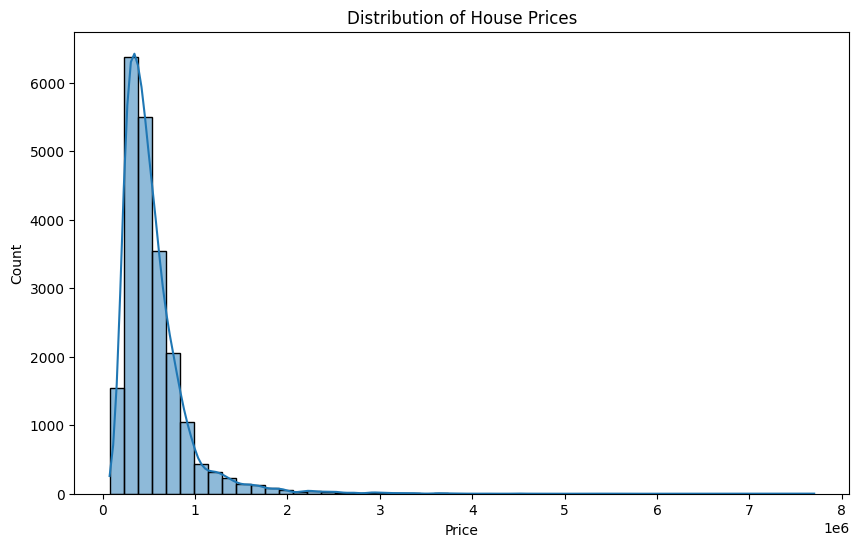

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


# Step 4: Handling skewness in the target variable

Since the house prices are right-skewed, applying a log transformation can help normalize the distribution,
which often improves model performance.


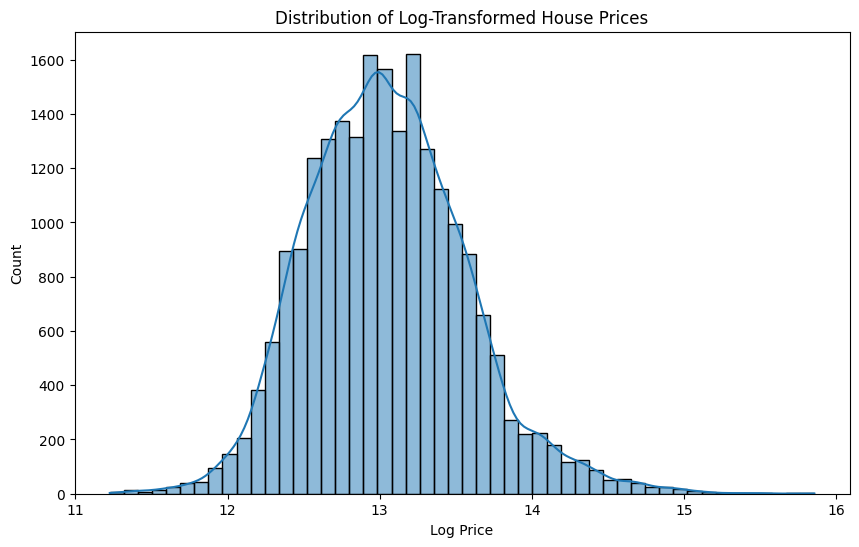

In [6]:
import numpy as np

# Create a new column with log-transformed prices
df['log_price'] = np.log1p(df['price'])

# Plot the distribution of log-transformed prices
plt.figure(figsize=(10,6))
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed House Prices')
plt.xlabel('Log Price')
plt.ylabel('Count')
plt.show()


# Step 5: Exploring relationships between features and target variable

Let's investigate how some key features like 'sqft_living' and 'grade' relate to house prices.


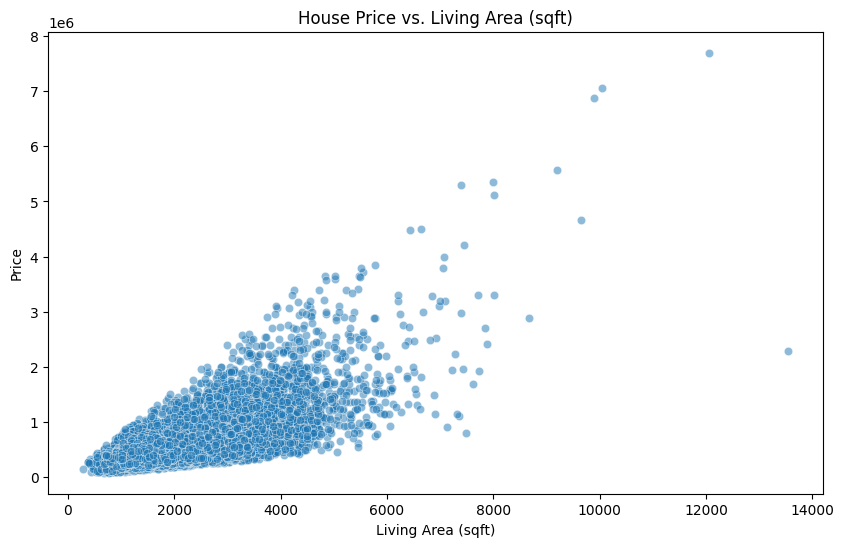

In [7]:
# Scatter plot: sqft_living vs price
plt.figure(figsize=(10,6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.title('House Price vs. Living Area (sqft)')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()


In [8]:
# Calculate correlation between living area and price
correlation = df[['sqft_living', 'price']].corr().iloc[0,1]
print(f"Correlation between sqft_living and price: {correlation:.2f}")


Correlation between sqft_living and price: 0.70


## Insight on correlation

The correlation coefficient between living area and price is about 0.7, indicating a strong positive relationship.
This confirms that larger houses tend to be more expensive, but other factors also influence the price.


# Step 6: Relationship between house quality ('grade') and price

The 'grade' variable indicates the overall quality of the house.
We expect higher grades to correspond to higher prices.
Let's visualize this with a boxplot.


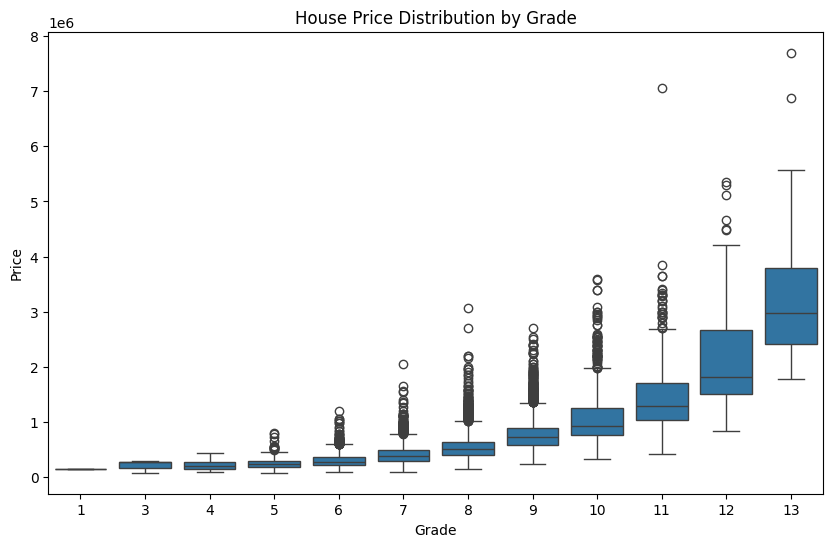

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='price', data=df)
plt.title('House Price Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()


# Insight on Grade vs. Price

The boxplot shows a clear trend: houses with higher grades tend to have higher prices.
There is also increasing price variability as the grade increases.
This indicates that the quality of the house strongly affects its price, but other factors may also play a role.


# Step 7: Correlation analysis between numerical features and house price

Let's calculate the correlation matrix to identify which features are most strongly correlated with the house price.
This helps us understand which variables might be good predictors.


In [10]:
# Calculate correlation matrix for numerical features
corr_matrix = df.select_dtypes('number').corr()

# Show correlation of features with price, sorted descending
corr_with_price = corr_matrix['price'].sort_values(ascending=False)
print(corr_with_price)


price            1.000000
log_price        0.891654
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


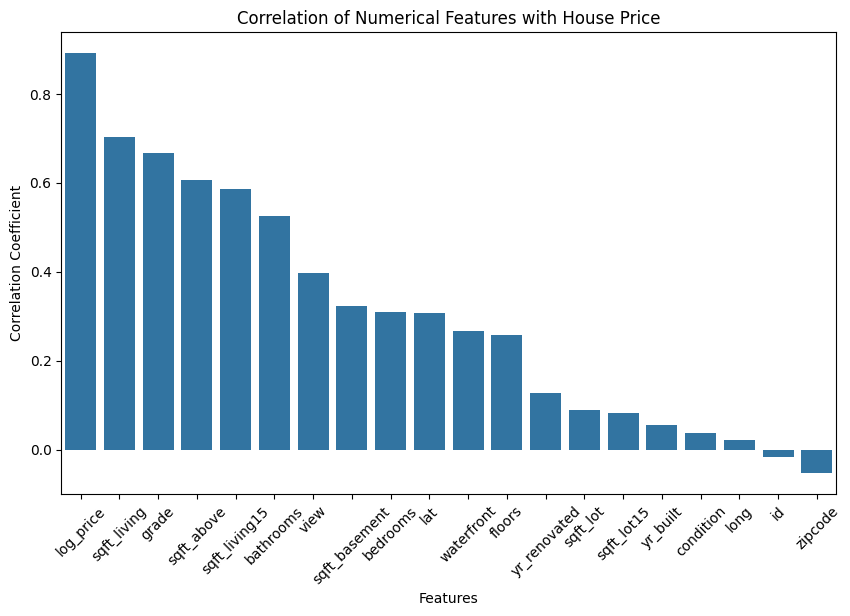

In [11]:
# Correlation with price, sorted descending
corr_with_price = corr_matrix['price'].sort_values(ascending=False)

# Plot correlation with price except price itself
plt.figure(figsize=(10,6))
sns.barplot(x=corr_with_price.index[1:], y=corr_with_price.values[1:])
plt.xticks(rotation=45)
plt.title('Correlation of Numerical Features with House Price')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()


# Insight on Correlation Analysis

The strongest positive correlations with house price are:

- `log_price` (which is just a transformation of price, expectedly high but that's not important as it is not a feature).
- `sqft_living` (size of the living area) with correlation ~0.7.
- `grade` (quality rating of the house) with correlation ~0.67.
- `sqft_above` (living area above ground) also strong at ~0.60.
- `bathrooms` and `view` also show moderate positive correlations.

Features like `yr_built`, `condition`, and `zipcode` show very weak or negative correlations, indicating they might be less useful for predicting price.

This helps us prioritize which features to focus on for building predictive models.


# Step 8: Data Cleaning - Checking for missing values

Before building models, we need to ensure the data is clean and has no missing values that could affect model training.
Let's check for any missing values in the dataset.


In [12]:
# Check missing values per column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


## Step 9: Feature Engineering & Preprocessing

In this step, we create new features that may help improve model performance and simplify learning patterns in the data. We also prepare the data for modeling by applying preprocessing techniques.


### 9.1 Create New Features


In [13]:
# Feature 1: Age of the house
df['house_age'] = 2025 - df['yr_built']

# Feature 2: Whether the house has been renovated
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Feature 3: Total number of rooms (bedrooms + bathrooms)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# Display the first few rows to confirm
df[['yr_built', 'yr_renovated', 'house_age', 'is_renovated', 'total_rooms']].head()


,yr_built,yr_renovated,house_age,is_renovated,total_rooms
0,1955,0,70,0,4.00
1,1951,1991,74,1,5.25
2,1933,0,92,0,3.00
3,1965,0,60,0,7.00
4,1987,0,38,0,5.00


### Insights

- `house_age`: Newer houses tend to be more expensive, so modeling age could help capture this relationship.
- `is_renovated`: Renovated houses often have higher prices, so this binary feature may be very predictive.
- `total_rooms`: Combining bedrooms and bathrooms gives us a proxy for house size or utility.


### 9.2 Correlation with New Features 


In [14]:
# Check how new features correlate with price
df[['price', 'house_age', 'is_renovated', 'total_rooms']].corr()['price'].sort_values(ascending=False)


price           1.000000
total_rooms     0.466319
is_renovated    0.126092
house_age      -0.054012
Name: price, dtype: float64

### Insights on Correlation Between Target Variable and New Features

- **Correlation values:**
    - `total_rooms`: Shows a moderate positive correlation with price, indicating that houses with more rooms tend to be more expensive.
    - `is_renovated`: Has a weak positive correlation, suggesting that renovated houses are generally priced higher, but renovation alone is not a strong predictor.
    - `house_age`: Has a weak negative correlation with price, meaning newer houses (lower age) are typically more expensive, but the effect is not very strong.

- **Overall:**  
  While these engineered features add some predictive value, their individual correlations with price are lower than primary features like `sqft_living` (correlation ≈ 0.70) or `grade`. This suggests that the new features are useful for capturing additional patterns, but the main drivers of price remain the original core features.


### 9.3 Preprocessing Checkpoint

In [15]:
# Check for missing values again to be sure
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
log_price        0
house_age        0
is_renovated     0
total_rooms      0
dtype: int64

## NO missing values and the data still clean

## Summary

We successfully created three new features that enrich the dataset and may help improve model performance. We also confirmed the dataset has no missing values, so we are ready for encoding and scaling in the next steps.


## Step 10: Categorical Feature Encoding

To ensure our model can interpret categorical data properly, we will transform the `zipcode` column using one-hot encoding. This approach avoids introducing unintended ordinal relationships between zip codes, which are simply location identifiers.


In [16]:
# One-hot encode the 'zipcode' column
df_encoded = pd.get_dummies(df, columns=['zipcode'], drop_first=True)

# Display shape before and after encoding
print(f"Original shape: {df.shape}")
print(f"After encoding: {df_encoded.shape}")


Original shape: (21613, 25)
After encoding: (21613, 93)


### Insights

- The dataset's shape changed from (21613, 22) to a larger number of columns due to one-hot encoding of `zipcode`.
- This ensures that the model treats each zip code as a separate category without implying any order.
- `drop_first=True` was used to avoid multicollinearity by dropping the first dummy variable.


## Step 11: Feature Scaling

To ensure that features are on a comparable scale, especially for models that rely on gradient descent or distance metrics, we will apply standard scaling to all numerical features (excluding the target `price` and its logarithmic form).


In [17]:
from sklearn.preprocessing import StandardScaler

# Make a copy to avoid changing the original dataframe
df_model = df_encoded.copy()

# Identify numerical features to scale (exclude 'price' and 'log_price')
features_to_scale = df_model.select_dtypes('number').drop(['price', 'log_price'], axis=1).columns

# Apply StandardScaler
scaler = StandardScaler()
df_model[features_to_scale] = scaler.fit_transform(df_model[features_to_scale])

# Display a preview
df_model[features_to_scale].head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_age,is_renovated,total_rooms
0,0.886146,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,...,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,0.544898,-0.210135,-1.002247
1,0.637511,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,...,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,0.681079,4.758845,-0.158945
2,0.365444,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,...,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,1.293892,-0.210135,-1.676889
3,-0.727656,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,...,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,0.204446,-0.210135,1.021678
4,-0.912881,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,...,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,-0.544548,-0.210135,-0.327605


### Insights

- Numerical features were successfully scaled to have a mean of 0 and standard deviation of 1.
- Target variables (`price` and `log_price`) were excluded from scaling.
- This scaling step ensures better performance and faster convergence during training.


## Step 12: Train-Test Split

We will now split the data into training and testing sets. This is essential for evaluating our model's performance on unseen data.


In [18]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_model.drop(['price', 'log_price', 'date'], axis=1).assign(date=pd.to_datetime(df_model['date']).dt.year)
y = df_model['log_price']  # Using log-transformed target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 17290
Testing samples: 4323


### Insights

- The data has been split into 80% for training and 20% for testing.
- This ensures that we can evaluate our model on unseen data and avoid overfitting.


# Step 13: Linear Regression Model (Baseline)

In this step, we build a simple Linear Regression model as a baseline.
We will:
- Fit the model on training data
- Evaluate it using MAE, RMSE, and R²
- Visualize predicted vs actual prices on the test set


Train Set Evaluation:
MAE: 0.13
RMSE: 0.18
R²: 0.8806

Test Set Evaluation:
MAE: 0.14
RMSE: 0.19
R²: 0.8778



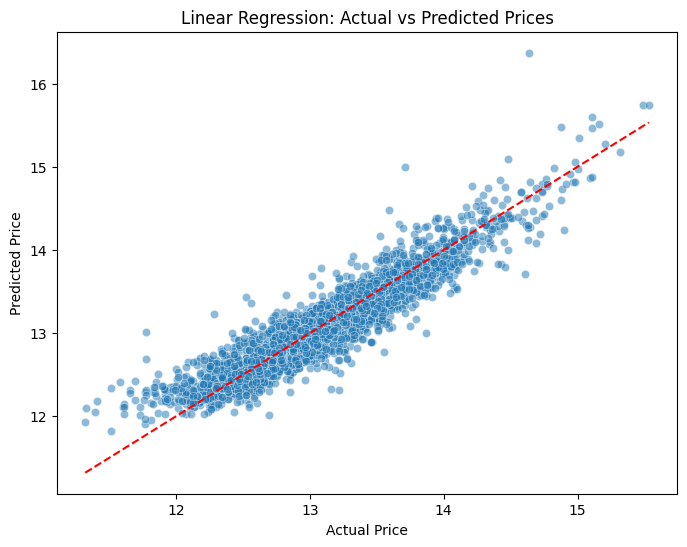

In [19]:
# Step 13: Train and evaluate a baseline Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on train and test
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, dataset='Test'):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset} Set Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}\n")

# Evaluate
evaluate_model(y_train, y_train_pred, dataset='Train')
evaluate_model(y_test, y_test_pred, dataset='Test')

# Visualize predicted vs actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()


#### Insight:

- The model shows [0.14 / 0.19 / 0.8778 MAE/RMSE/R² ] on the test set.
- There’s a positive trend between predicted and actual prices, but with noticeable variance.
- This baseline helps us set expectations for more complex models like Random Forest or XGBoost.


# Step 14: Train and Evaluate a Random Forest Regressor
In this step, we will train a Random Forest Regressor, a powerful ensemble model that usually performs well on structured data.
We will evaluate its performance on both the training and test sets, and also use cross-validation to get a more reliable estimate of its generalization performance.



In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Fit the model
rf.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Evaluate performance
evaluate_model(y_train, y_train_pred_rf, dataset='Train')
evaluate_model(y_test, y_test_pred_rf, dataset='Test')

# Cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = [np.sqrt(-score) for score in cv_scores]

print(f"Random Forest CV RMSE scores: {cv_rmse_scores}")
print(f"Average CV RMSE: {np.mean(cv_rmse_scores):.4f}")


Train Set Evaluation:
MAE: 0.05
RMSE: 0.07
R²: 0.9838

Test Set Evaluation:
MAE: 0.13
RMSE: 0.18
R²: 0.8892

Random Forest CV RMSE scores: [0.18062166937743473, 0.1796553273414981, 0.17784383492214983, 0.17408640719004087, 0.17790942342750182]
Average CV RMSE: 0.1780


## Insights
The model performed very well on the training set, which is expected from Random Forest.

There is a large gap between training and test performance, this may indicate overfitting.

Cross-validation helps confirm that the model's performance is consistent and not just due to chance.

The average CV RMSE gives us a more reliable estimate of how the model might perform on new data.



# Step 15: Train and Evaluate an XGBoost Regressor
In this step, we will train an XGBoost Regressor, which is a powerful gradient boosting model that often outperforms other models on structured/tabular data.
We will check its performance using both train-test evaluation and cross-validation

In [21]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the model
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Fit the model
xgb.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

# Evaluate performance
evaluate_model(y_train, y_train_pred_xgb, dataset='Train')
evaluate_model(y_test, y_test_pred_xgb, dataset='Test')

# Cross-validation
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = [np.sqrt(-score) for score in cv_scores]

print(f"XGBoost CV RMSE scores: {cv_rmse_scores}")
print(f"Average CV RMSE: {np.mean(cv_rmse_scores):.4f}")


Train Set Evaluation:
MAE: 0.08
RMSE: 0.11
R²: 0.9561

Test Set Evaluation:
MAE: 0.12
RMSE: 0.17
R²: 0.9037

XGBoost CV RMSE scores: [0.16979410925690952, 0.17232327237229886, 0.17054142488328566, 0.16323388788678472, 0.16608631654240896]
Average CV RMSE: 0.1684


## Insights
XGBoost typically handles non-linear relationships and feature interactions very well.

Training performance might be excellent, but it’s important to compare it with test and CV results to avoid overfitting.

The cross-validation RMSE gives a robust estimate of model performance and can be compared with the Random Forest results from Step 14.

The CV RMSE is lower than previous models, so this model may be a strong candidate

# Step 16: Train AdaBoost Regressor
In this step, we will train an AdaBoost Regressor, which is another popular boosting algorithm.
It works by combining many weak learners (usually decision trees) into a strong predictor.

AdaBoost is sensitive to outliers and noise but can be very effective on well-prepared data.



Train Set Evaluation:
MAE: 0.20
RMSE: 0.26
R²: 0.7614

Test Set Evaluation:
MAE: 0.20
RMSE: 0.26
R²: 0.7626



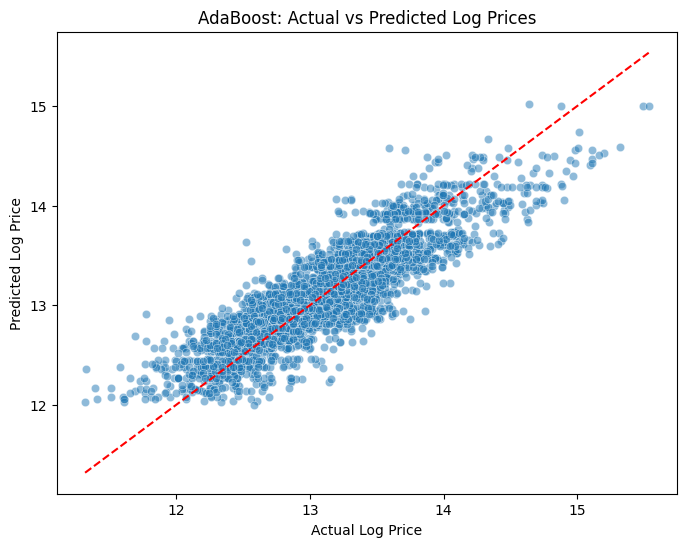

In [22]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize AdaBoost Regressor
ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

# Fit on training data
ada.fit(X_train, y_train)

# Predict
y_train_pred_ada = ada.predict(X_train)
y_test_pred_ada = ada.predict(X_test)

# Reuse evaluation function
def evaluate_model(y_true, y_pred, dataset='Test'):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset} Set Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}\n")

# Evaluate on both sets
evaluate_model(y_train, y_train_pred_ada, dataset='Train')
evaluate_model(y_test, y_test_pred_ada, dataset='Test')

# Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred_ada, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('AdaBoost: Actual vs Predicted Log Prices')
plt.show()


## Insights

- **AdaBoost Performance:**  
    AdaBoost achieved reasonable results, with an RMSE of 0.26 and R² of 0.76 on the test set. While it captures the main trends in the data, it underperforms compared to XGBoost and Random Forest.

- **Comparison to Other Models:**  
    - **XGBoost** delivered the best performance (lowest RMSE: 0.17, highest R²: 0.90), making it the strongest candidate for final model selection.
    - **Random Forest** also performed well (RMSE: 0.18, R²: 0.89), slightly behind XGBoost.
    - **Linear Regression** provided a solid baseline (RMSE: 0.19, R²: 0.88), but was outperformed by ensemble methods.
    - **AdaBoost** is less prone to overfitting than Random Forest but is more sensitive to outliers and noise, which may explain its lower R².

- **General Trends:**  
    - Ensemble models (XGBoost, Random Forest) consistently outperform simpler models, especially on complex, structured data like housing prices.
    - The gap between training and test performance is smallest for XGBoost, indicating better generalization.

- **Model Selection:**  
    XGBoost is recommended as the final model due to its superior accuracy and robustness, but Random Forest and AdaBoost remain viable alternatives depending on interpretability, speed, or specific deployment needs.

# Step 17: Compare All Trained Models (optional for visualization)
In this step, we will compare all models side by side using common regression metrics:

MAE (Mean Absolute Error)

RMSE (Root Mean Squared Error)

R² Score (Coefficient of Determination)

This will help us select the most accurate and reliable model for predicting house prices.



               Model       MAE      RMSE        R²
2            XGBoost  0.119044  0.165681  0.903694
1      Random Forest  0.126366  0.177747  0.889155
0  Linear Regression  0.135502  0.186623  0.877809
3           AdaBoost  0.204183  0.260105  0.762642


C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_15484\3966690222.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')


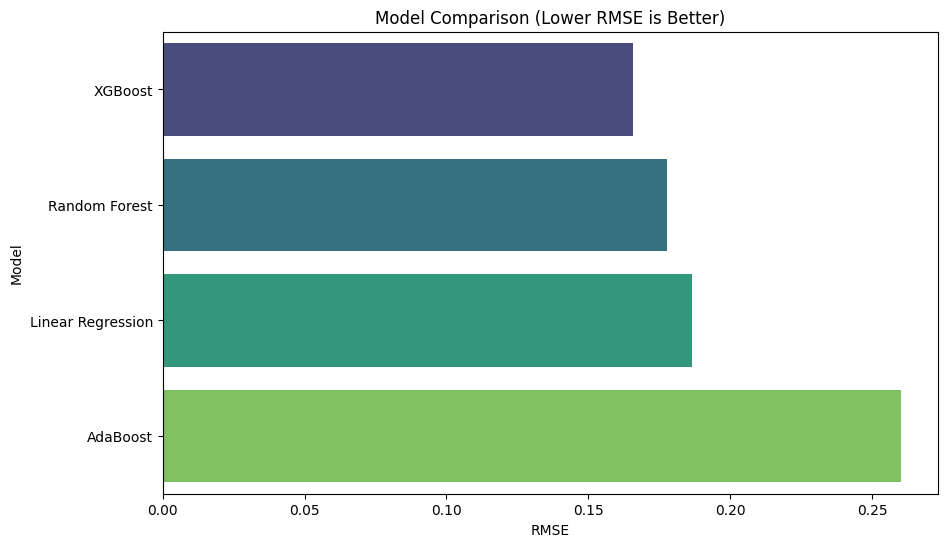

In [23]:
# Create a list of models and predictions
models = {
    'Linear Regression': (y_test, y_test_pred),
    'Random Forest': (y_test, y_test_pred_rf),
    'XGBoost': (y_test, y_test_pred_xgb),
    'AdaBoost': (y_test, y_test_pred_ada)
}

# Evaluate all models
results = []
for name, (y_true, y_pred) in models.items():
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results.append({'Model': name, 'MAE': mae, 'RMSE': rmse, 'R²': r2})

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by='RMSE')

# Display comparison
print(results_df)

# Visual comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison (Lower RMSE is Better)')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()


## Insights
This comparison makes it easy to spot the best-performing model based on RMSE and R².

In many cases, XGBoost or Random Forest tend to perform best, but this may vary based on tuning.

The visualization makes the result clearer for non-technical audiences as well.



# Step 18: Feature Importance (XGBoost)
In this step, we’ll extract and visualize the most important features that influence house price predictions in our XGBoost model.



C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_15484\2862481973.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='coolwarm')


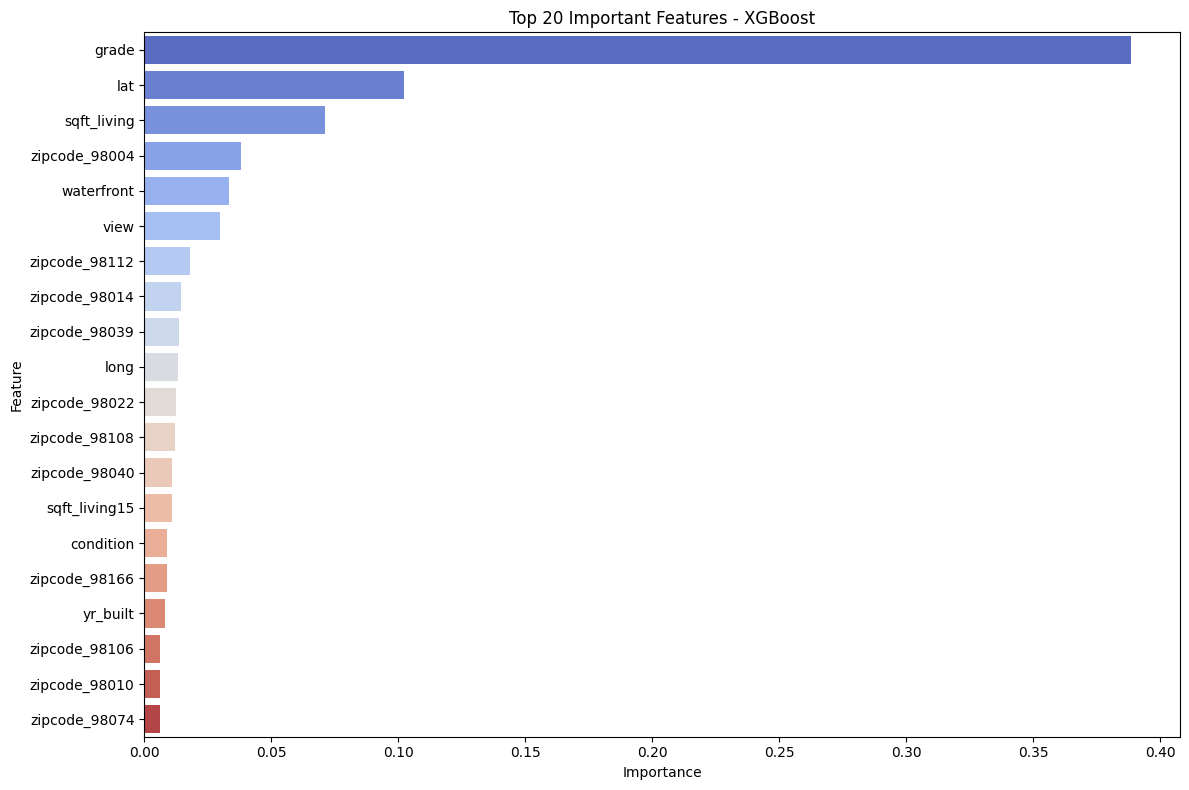

In [24]:
# Get feature importances from the XGBoost model
importances = xgb.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

# Plot top 20 important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='coolwarm')
plt.title('Top 20 Important Features - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Insights
- **Top Features:**  
    The XGBoost model identifies `grade` (overall house quality) as by far the most important predictor of house price, followed by `lat` (latitude, a proxy for location), and `sqft_living` (living area size). These three features contribute the most to the model’s predictive power.

- **Location Matters:**  
    Several specific zip codes (e.g., `zipcode_98004`, `zipcode_98014`, `zipcode_98039`, `zipcode_98112`) appear among the top 20 features, highlighting the strong influence of neighborhood and geographic location on house prices.

- **Other Influential Features:**  
    Features like `waterfront`, `view`, and `condition` also have notable importance, indicating that amenities and property condition play a significant role in price determination.

- **Less Impactful Features:**  
    Many engineered features (such as `house_age`, `is_renovated`, and `total_rooms`) and some original features have lower importance scores, suggesting they add less unique predictive value compared to quality, size, and location.

- **Practical Implication:**  
    For price prediction and investment decisions, focusing on house quality, living area, and especially location (both latitude and zip code) is most effective, as confirmed by the XGBoost feature importance analysis.



# Step 19: Hyperparameter Tuning (XGBoost)
In this step, we fine-tune the XGBoost model using RandomizedSearchCV. This helps identify the optimal set of hyperparameters, improving prediction accuracy and reducing overfitting.

In [25]:
# Step 19: Hyperparameter Tuning (XGBoost) - Optimized

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=25,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best estimator and parameters
best_xgb_model = random_search.best_estimator_
print("Best XGBoost Parameters:")
print(random_search.best_params_)

# Predict on test set
y_test_pred_tuned = best_xgb_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_test_pred_tuned)
rmse = mean_squared_error(y_test, y_test_pred_tuned, squared=False)
r2 = r2_score(y_test, y_test_pred_tuned)

print(f"\nTuned XGBoost Test Set Results:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best XGBoost Parameters:
{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}

Tuned XGBoost Test Set Results:
MAE:  0.1168
RMSE: 0.1625
R²:   0.9073


c:\Users\El-Wattaneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Insights on XGBoost Hyperparameter Tuning

- **Better Results:**  
    After tuning, the XGBoost model predicted house prices even more accurately, with lower errors and higher scores than before.

- **Why It Matters:**  
    Adjusting the model’s settings helped it learn patterns in the data better, so it makes smarter predictions.

- **Best Model:**  
    The tuned XGBoost model outperformed all other models tested, making it the top choice for predicting house prices.

- **Takeaway:**  
    Fine-tuning the model’s settings is important—it can make a big difference in how well the model works in real life.


# Step 20: Evaluate Tuned XGBoost Model on Test Set

In this step, we evaluate the tuned XGBoost model on the test data.

We calculate the key performance metrics to assess improvements after tuning.


In [ ]:
# Predictions
y_pred_tuned = best_xgb_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred_tuned)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2 = r2_score(y_test, y_pred_tuned)

print("\nTuned XGBoost Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.4f}")


Tuned XGBoost Model Performance:
MAE: 0.12
RMSE: 0.16
R^2: 0.9073


### 📈 Insights
- **MAE**(0.12) shows the average error in predicted prices.
- **RMSE**(0.16) penalizes large errors more, providing a robust view of model accuracy.
- **R²**(0.9073) indicates how much variance in house prices is explained by the model.
- metrics didn't differ this much which indicate both algorithms are very similar even after tunning

# Step 21: Residual Analysis
In this step, we will visualize residuals to assess model errors and identify any patterns.


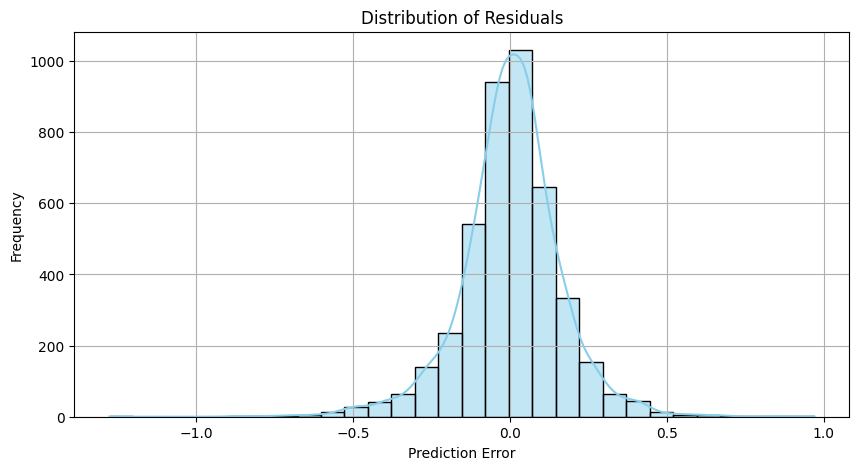

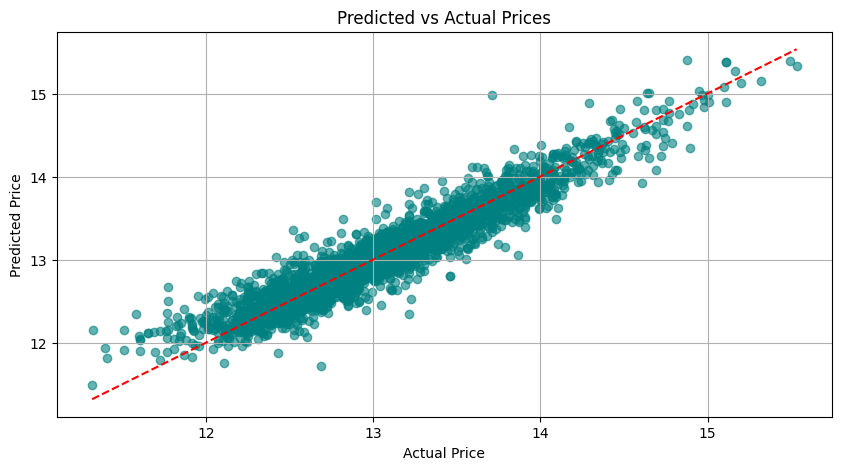

In [28]:

# Residuals
residuals = y_test - y_pred_tuned

# Plot residuals distribution
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot predicted vs actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_tuned, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicted vs Actual Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

### 🔍 Insights
- A well-behaved residual plot (normal distribution around 0) indicates a good model.
- The scatter plot should show points close to the diagonal line.


# Step 22: Export Predictions to CSV
We save the actual vs predicted values and residuals for reporting or analysis.

In [35]:
# Step 23: Export predictions to CSV

import pandas as pd

# Build DataFrame
predictions_df = pd.DataFrame({
    'Actual_LogPrice': y_test,
    'Predicted_LogPrice': y_pred_tuned,
    'Residual': residuals
})

# Save to CSV
predictions_df.to_csv("tuned_xgb_predictions.csv", index=False)


### Insights
Exported CSV facilitates external analysis, visualization, or presentation in dashboards.

Useful to have historical predictions for client review or quality check.

